<a href="https://colab.research.google.com/github/ram30098singh/Deep-learning-and-NLP-/blob/main/diabetes_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes prediction dataset

## About Dataset
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

# Table of Contents

1. Objective

2. Import the libraries

3. Dataset Description

4. Exploratory data analysis(EDA)

5. Data preprocessing

6. Building the Neural Network Model

7. Making Predictions

8. Calculating Accuracy

9. visualization with the help of different graph

   a.) Loss and Accuracy Curves

   b.) Receiver Operating Characteristic (ROC) Curve

   c.) Confusion Matrix

10. Feature importance

# Objective
This dataset will be used to build  models to predict diabetes in patients based on their medical history and demographic information.

1. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.

2. The dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

Import the libraries



In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from  pathlib import Path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [71]:
# diabetes_prediction_dataset
data = pd.read_csv("https://raw.githubusercontent.com/ram30098singh/Deep-learning-and-NLP-/main/diabetes_prediction_dataset.csv")

## Loading and Explore the dataset

In [72]:
data.shape
data.head()

(100000, 9)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [74]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Exploratory data analysis(EDA)

<Axes: >

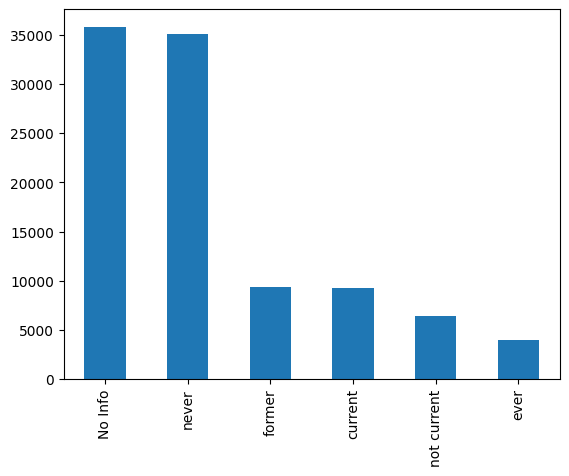

In [75]:
data.smoking_history.value_counts().plot(kind='bar')
plt.show()

<Axes: >

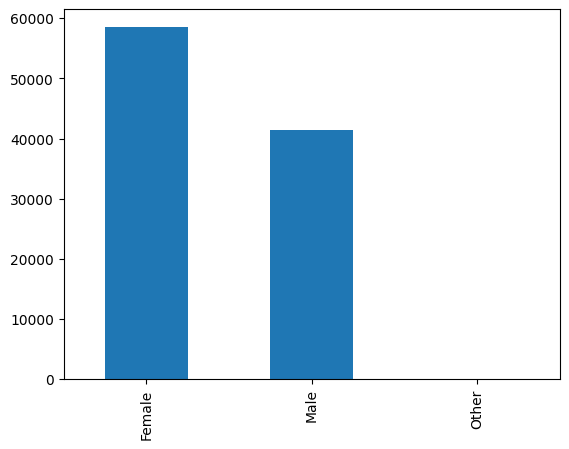

In [76]:
data.gender.value_counts().plot(kind='bar')
plt.show()

## Data preprocessing

In [77]:
#  Pop out target
y = data.pop('diabetes')
y.shape

(100000,)

In [78]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [79]:
data['gender'] = data['gender'].map({'Female' : 0, 'Male' : 1, 'Other' : 2})

In [80]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [81]:
data['smoking_history'] = data['smoking_history'].map({'never' : 0, 'No Info' : 1, 'current' : 2, 'former' : 3, 'ever' : 4, 'not current' : 5})

In [82]:
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [83]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(75000, 8)

(25000, 8)

(75000,)

(25000,)

Feature Scaling

In [84]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [85]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Building the Neural Network Model

In [86]:
model = tf.keras.Sequential()

In [87]:
model.add(tf.keras.layers.Input(shape=8,))

In [88]:
model.add(tf.keras.layers.Dense(50, activation = 'relu'))

In [89]:
model.add(tf.keras.layers.Dense(100, activation = 'relu'))

In [90]:
model.add(tf.keras.layers.Dense(20, activation = 'relu'))

In [91]:
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                450       
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 20)                2020      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,591
Trainable params: 7,591
Non-trainable params: 0
_________________________________________________________________


In [93]:
from tensorflow.keras.utils import plot_model

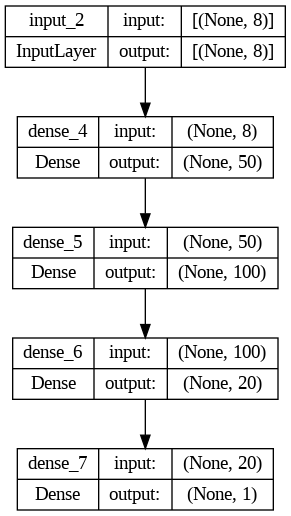

In [94]:
plot_model(model, show_shapes=True)

Compiling the Model

In [95]:
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',

                 metrics = ['acc'])

Training the Model

In [96]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
2344/2344 [==============================] - 7s 2ms/step - loss: 0.1367 - acc: 0.9550
Epoch 2/200
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1106 - acc: 0.9625
Epoch 3/200
2344/2344 [==============================] - 8s 3ms/step - loss: 0.0988 - acc: 0.9665
Epoch 4/200
2344/2344 [==============================] - 10s 4ms/step - loss: 0.0921 - acc: 0.9681
Epoch 5/200
2344/2344 [==============================] - 11s 5ms/step - loss: 0.0888 - acc: 0.9697
Epoch 6/200
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0879 - acc: 0.9696
Epoch 7/200
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0872 - acc: 0.9700
Epoch 8/200
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0875 - acc: 0.9697
Epoch 9/200
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0858 - acc: 0.9703
Epoch 10/200
2344/2344 [==============================] - 4s 2ms/step - loss: 0.0856 - acc: 0.9705
Epoch 11/200
2344

Epoch 1/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0787 - acc: 0.9726 - val_loss: 0.0971 - val_acc: 0.9692
Epoch 2/200
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0777 - acc: 0.9732 - val_loss: 0.0909 - val_acc: 0.9701
Epoch 3/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0780 - acc: 0.9728 - val_loss: 0.0934 - val_acc: 0.9701
Epoch 4/200
2344/2344 [==============================] - 6s 3ms/step - loss: 0.0774 - acc: 0.9731 - val_loss: 0.0944 - val_acc: 0.9709
Epoch 5/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0790 - acc: 0.9725 - val_loss: 0.0901 - val_acc: 0.9703
Epoch 6/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0775 - acc: 0.9730 - val_loss: 0.0928 - val_acc: 0.9694
Epoch 7/200
2344/2344 [==============================] - 6s 3ms/step - loss: 0.0784 - acc: 0.9726 - val_loss: 0.0918 - val_acc: 0.9708
Epoch 8/200
2344/2344 [==============================] 

<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Loss Over Epochs')

<Axes: >

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy Over Epochs')

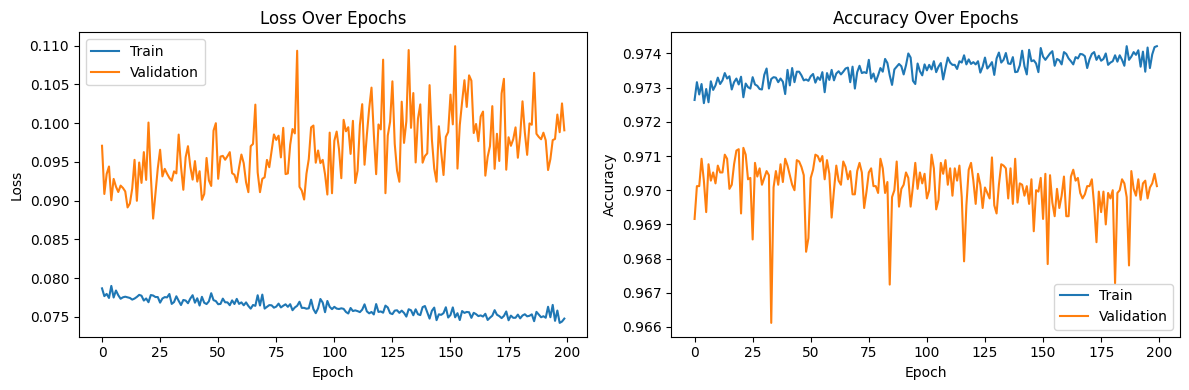

In [103]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


## Making Predictions:

In [104]:
pred = model.predict(X_test)

782/782 [==============================] - 1s 1ms/step


In [105]:
pred

array([[0.0000000e+00],
       [6.6275728e-16],
       [1.8578403e-02],
       ...,
       [4.6715721e-02],
       [1.7401408e-02],
       [1.8218079e-25]], dtype=float32)

In [106]:
xy=np.round(pred)
z=xy.flatten()

## Calculating Accuracy:

In [107]:
(z==y_test).sum()/len(y_test)

0.97012

In [108]:
y_test.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

<Figure size 800x600 with 0 Axes>

<BarContainer object of 1 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'Accuracy')

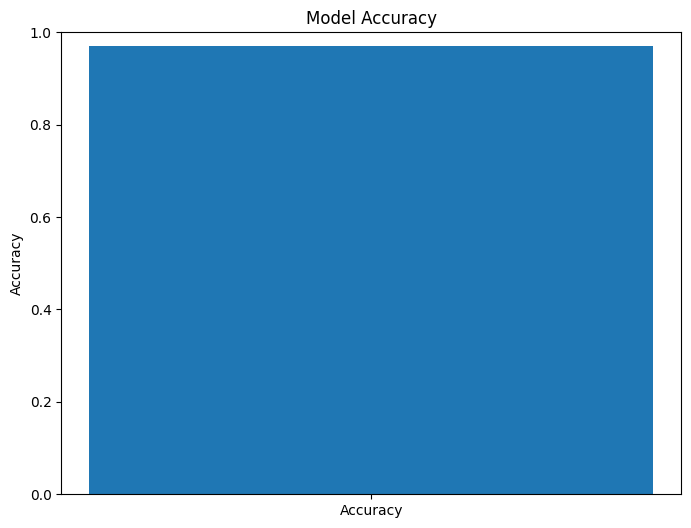

In [109]:
# Calculate accuracy
accuracy = (z == y_test).sum() / len(y_test)

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


<Figure size 600x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

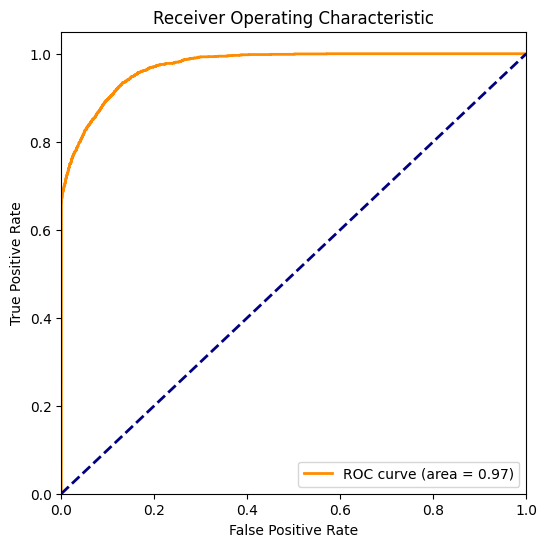

In [110]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


<Figure size 600x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 36.72222222222221, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

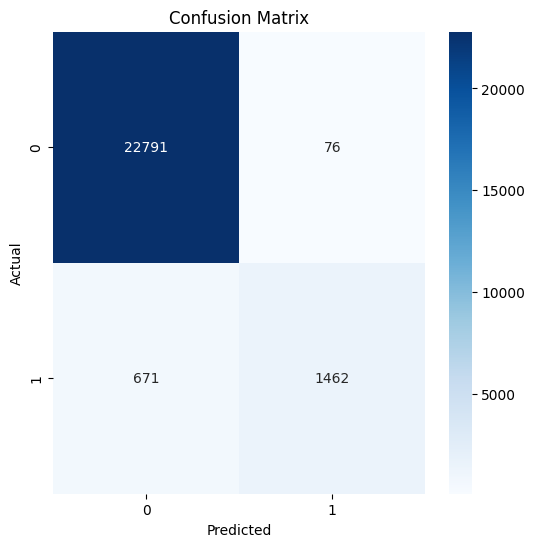

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, z)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [118]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.7 MB/s eta 0:00:00


## Feature importance

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
Exact explainer: 25001it [11:43, 35.26it/s]                           


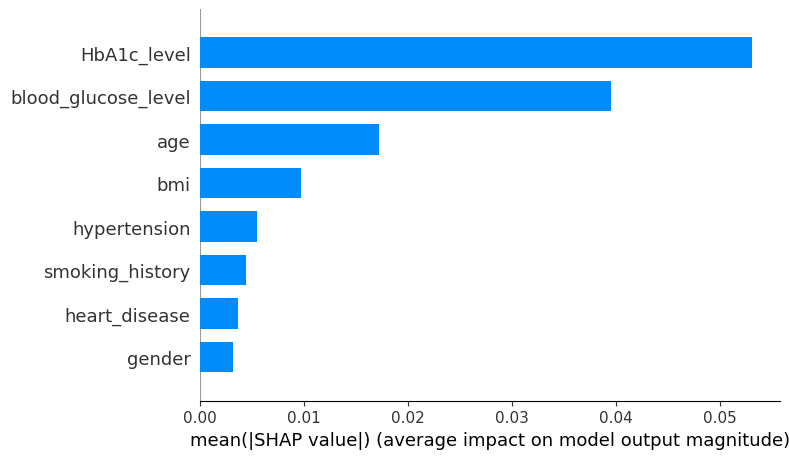

In [119]:
import shap

# Create an explainer for the model
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the entire test set
shap_values = explainer(X_test)

# Plot feature importance summary
shap.summary_plot(shap_values, X_test, feature_names=data.columns, plot_type='bar')
